# Velocity field analysis 

In [33]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import time
import os.path

In [34]:
N    = 300
#Load on HDD
if os.path.isfile('D:/PDM_data/Bentheimer300/Ux.dat') :
    ux   = np.loadtxt('D:/PDM_data/Bentheimer300/Ux.dat')
    uy   = np.loadtxt('D:/PDM_data/Bentheimer300/Uy.dat')
    uz   = np.loadtxt('D:/PDM_data/Bentheimer300/Uz.dat')
#Load on SDD
else :
    ux   = np.loadtxt('../data/Bentheimer300/Ux.dat')
    uy   = np.loadtxt('../data/Bentheimer300/Uy.dat')
    uz   = np.loadtxt('../data/Bentheimer300/Uz.dat')

In [17]:
uxmean = ux.mean()
uymean = uy.mean()
uzmean = uz.mean()
print ( 'Shape : ' + str(ux.shape))
print ( 'Overall Means : ux = '+str(uxmean)+ ', uy = '+str(uymean)+', uz = '+str(uzmean))

Shape : (90000, 300)
Overall Means : ux = 3.918195014621102e-06, uy = -1.0156482644363791e-07, uz = 2.726992976899063e-07


In [41]:
phi = 0.2
uux = ux.reshape(N**3)
uuy = uy.reshape(N**3)
uuz = uz.reshape(N**3)
Uxmean = Uymean = Uzmean = 0
for (i2,i3) in zip(range(N),range(N)) :
    i1 = 0
    Uxmean += uux[N**2*i3 + N*i2 + i1]
    Uymean += uuy[N**2*i3 + N*i2 + i1]
    Uzmean += uuz[N**2*i3 + N*i2 + i1]
Uxmean /= (N**2)/phi
Uymean /= (N**2)/phi
Uzmean /= (N**2)/phi
print ( 'Inlet Means : ux = '+str(Uxmean)+ ', uy = '+str(Uymean)+', uz = '+str(Uzmean))

Inlet Means : ux = 1.2834873480490838e-09, uy = -2.142525956808613e-10, uz = 3.891557970502053e-11


### Eulerian x,y,z velocity PDF

<IPython.core.display.Javascript object>


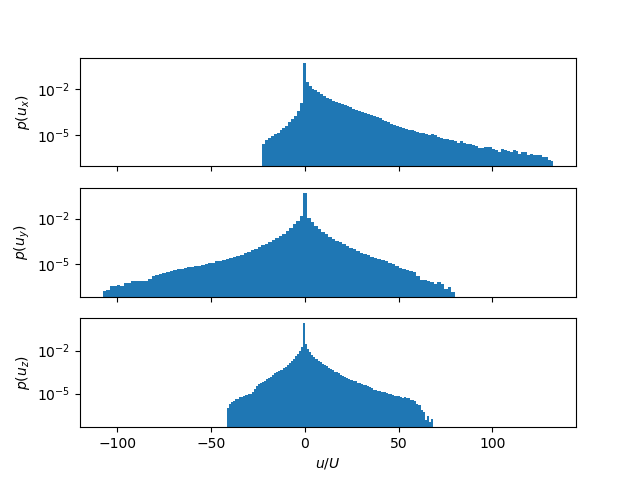

Text(0.5, 0, '$u/U$')

In [6]:
#Log velocity magnitude
U=uxmean
fig, axs = plt.subplots(3,1, sharex = True)
NBINS=100
#UX
axs[0].hist(ux.reshape(N**3)/U, bins = NBINS, density = True, log = True);
axs[0].set_ylabel(r'$p(u_x)$')
#UY
axs[1].hist(uy.reshape(N**3)/U, bins = NBINS, density = True, log = True);
axs[1].set_ylabel(r'$p(u_y)$')
#UZ
axs[2].hist(uz.reshape(N**3)/U, bins = NBINS, density = True, log = True);
axs[2].set_ylabel(r'$p(u_z)$')
axs[2].set_xlabel(r'$u/U$')

### Eulerian log velocity magnitude

In [12]:
Vm = np.sqrt(ux*ux + uy*uy + uz*uz)/U
Vm = Vm.reshape(N*N*N);
Vm_min=min(Vm)
Vm_max=max(Vm)
print(str(Vm.shape)+', Vm min = '+str(Vm_min)+', Vm max = '+str(Vm_max))

(27000000,), Vm min = 0.0, Vm max = 139.30479234291366


In [ ]:
NBINS=100

#Ui histograms
'''
fig, ax = plt.subplots(1,1)
ax.hist((ux.reshape(N*N*N)/U), bins = NBINS, normed = True, alpha = 0.5);
ax.hist((uy.reshape(N*N*N)/U), bins = NBINS, normed = True, alpha = 0.5);
ax.hist((uz.reshape(N*N*N)/U), bins = NBINS, normed = True, alpha = 0.5);
'''

#Log velocity magnitude
logVm = [np.log(v_) for v_ in Vm if v_ > 0]

<IPython.core.display.Javascript object>


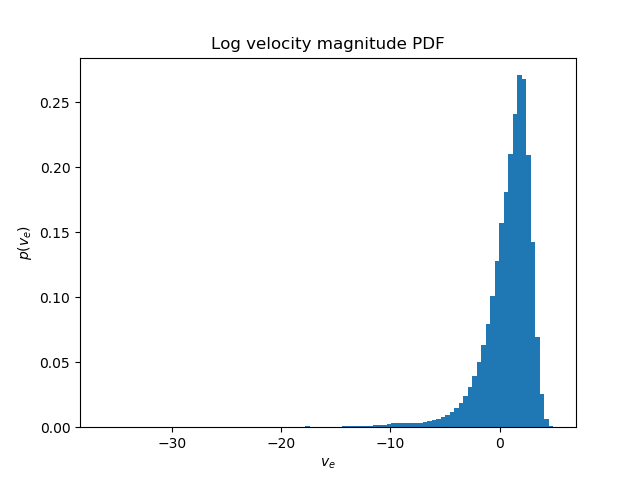

Text(0.5, 0, '$v_e$')

In [15]:
fig, ax = plt.subplots(1,1)
hist=ax.hist(logVm, bins = NBINS,  density = True, log = False)
ax.set_title('Log velocity magnitude PDF')
ax.set_ylabel(r'$p(v_e)$')
ax.set_xlabel(r'$v_e$')